## AHE Peak Finder

### Read Me
    1. This notebook needs to be run in order from top cell down, running in other orders can cause errors
    2. The notebook takes all files in a given directory and finds max and min values based on the current used
    3. The notebook prints all values used to make averages so that if there are errors/bad data sets they are easier to find

In [16]:
# * represents wildcard characters, desired file name types should be typed explicitly surrounded by *, ie: *desired_field*
directory = r'C:\Users\Neuromancer\Desktop\data2\*AHE_DC_*'

No errors found.
I-Dc (mA)    AHE files in current folder
-5.0         C:\Users\Neuromancer\Desktop\data2\sample_nameAHE_DC_2725.27Ohm_0.0Oe_-5.0mA_2018-11-06-163515
-4.0         C:\Users\Neuromancer\Desktop\data2\sample_nameAHE_DC_2709.78Ohm_100.0Oe_-4.0mA_2018-11-06-162857
-4.0         C:\Users\Neuromancer\Desktop\data2\sample_nameAHE_DC_2714.18Ohm_0.0Oe_-4.0mA_2018-11-06-163011
-4.0         C:\Users\Neuromancer\Desktop\data2\sample_nameAHE_DC_2715.09Ohm_-100.0Oe_-4.0mA_2018-11-06-163126
-3.0         C:\Users\Neuromancer\Desktop\data2\sample_nameAHE_DC_2697.66Ohm_0.0Oe_-3.0mA_2018-11-06-162554
-3.0         C:\Users\Neuromancer\Desktop\data2\sample_nameAHE_DC_2697.94Ohm_-100.0Oe_-3.0mA_2018-11-06-162710
-3.0         C:\Users\Neuromancer\Desktop\data2\sample_nameAHE_DC_2699.02Ohm_100.0Oe_-3.0mA_2018-11-06-162439
-2.0         C:\Users\Neuromancer\Desktop\data2\sample_nameAHE_DC_2684.98Ohm_100.0Oe_-2.0mA_2018-11-06-162043
-2.0         C:\Users\Neuromancer\Desktop\data2\sample_nameAHE_DC_

<IPython.core.display.Javascript object>


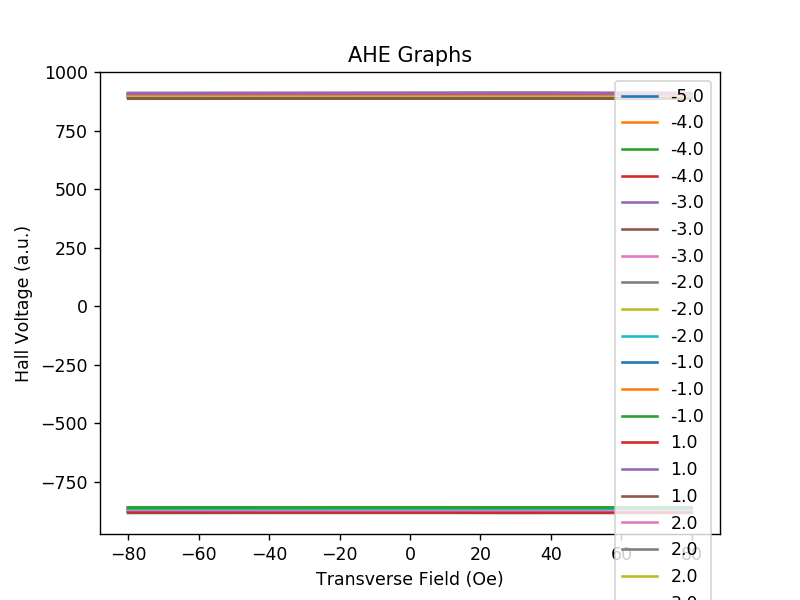

In [22]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np 
import glob as glob

FileList = []

# takes filepath and returns float current(mA) value
def getCurrent(file):
    for x in file.split('_'):
        if x.endswith('mA'):
            return (float(x[0:(len(x) - 2)]))

# takes file and unpacks data from it so it can be graphed in matplotlib, returns numpy array
def unpack(file, array):
    t = np.loadtxt(file, delimiter=None, skiprows=5, usecols=(1,2))
    index = array.shape[1] #index of where to add t to array
    #loop to find first empty column in the array
    for n in range(0, array.shape[1]):
        if (array[:, n]==0).all() and (index > n):
            index = n
    
    # if index == 0, then add both x and y data, otherwise add y data only
    if (index == 0):
        array[0:array.shape[0],index:2] += t
        #print('first addition')
    else:
        array[0:array.shape[0],index] += t[0:array.shape[0], 1]
        #print('more data added at', index)
    
    return array


# finds the length of file data and number of files, returns as tuple
def dataSize():
    q = np.loadtxt(FileList[0][0], delimiter=None, skiprows=5, usecols=(0))
    return ((q.shape[0], len(FileList)+1))

# searches through directory and creates list of tuples (filepath, float(current))
for j in glob.glob(directory):
    FileList.append((j, getCurrent(j)))
    
# sort tuple list by current
FileList.sort(key=lambda tup: tup[1])


#initialize Dataset to array of all 0's
DataSet = np.zeros(dataSize())

#creates tuples of numpy array and corresponding current value
for x in FileList:
    DataSet = unpack(x[0], DataSet)
    
#checks to make sure data set has transfered properly    
if (DataSet[:,:] == 0).any():
    print('zero error!')
else:
    print('No errors found.')
    
print('I-Dc (mA)    AHE files in current folder')
for x in FileList:
    print(x[1], '       ', x[0])
    
plt.figure()
for i in range(1, DataSet.shape[1]):
    plt.plot(DataSet[:,0], DataSet[:,i], label=str(FileList[i-1][1]))

plt.title('AHE Graphs')
plt.xlabel('Transverse Field (Oe)')
plt.ylabel('Hall Voltage (a.u.)')
plt.legend()
plt.show()

Current value  -5.0 values averaged  [46.6666666667, 29.3333333333]
Current value  -4.0 values averaged  [46.6666666667, 26.6666666667]
Current value  -4.0 values averaged  [45.3333333333, 26.6666666667]
Current value  -4.0 values averaged  [45.3333333333, 26.6666666667]
Current value  -3.0 values averaged  [45.3333333333, 24.0]
Current value  -3.0 values averaged  [45.3333333333, 24.0]
Current value  -3.0 values averaged  [45.3333333333, 22.6666666667]
Current value  -2.0 values averaged  [44.0, 22.6666666667]
Current value  -2.0 values averaged  [44.0, 21.3333333333]
Current value  -2.0 values averaged  [44.0, 21.3333333333]
Current value  -1.0 values averaged  [44.0, 18.6666666667]
Current value  -1.0 values averaged  [42.6666666667, 21.3333333333]
Current value  -1.0 values averaged  [44.0, 18.6666666667]
Current value  1.0 values averaged  [40.0, 17.3333333333]
Current value  1.0 values averaged  [38.6666666667, 13.3333333333]
Current value  1.0 values averaged  [40.0, 13.33333333

<IPython.core.display.Javascript object>


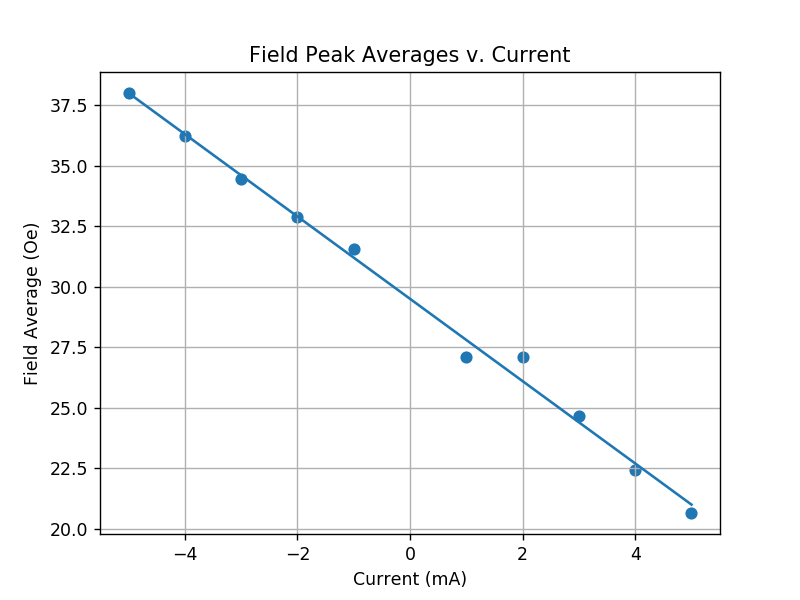

In [23]:
%matplotlib notebook
from scipy import optimize
#Analyzer Code

# half of data, 1 peak per half
h = int(DataSet.shape[0]/2) # will round down if odd number of points

# array of averages of peaks
avg = np.zeros(DataSet.shape[1]-1) # initialize to all zeros

# takes list of numbers and averages them all
def average(list1):
    tot = 0.0
    for x in list1:
        tot += x
    return tot/len(list1)

# finds min/max values (n and m) and then finds associated index and then the associated field (h1 and h2) 
for x in range(1, DataSet.shape[1]):
    if FileList[x-1][1] < 0: # find min for negative currents
        n = DataSet[:h, x]
        m = DataSet[h + 1:, x]
        index1 = np.where(n == n.min())
        index2 = np.where(m == m.min())
        h1 = DataSet[index1[0][0], 0]
        h2 = DataSet[index2[0][0] + h, 0]
        print('Current value ', FileList[x-1][1], 'values averaged ', [float(h1), float(h2)])
        avg[x-1] = average([float(h1), float(h2)]) #puts the average at the associated current place
        
    else: # find max for positive currents
        n = DataSet[:h, x]
        m = DataSet[h + 1:, x]
        index1 = np.where(n == n.max())
        index2 = np.where(m == m.max())
        h1 = DataSet[index1[0], 0]
        h2 = DataSet[index2[0] + h, 0]
        print('Current value ', FileList[x-1][1], 'values averaged ', [float(h1), float(h2)])
        avg[x-1] = average([float(h1), float(h2)]) #puts the average at the associated current place

avg_2 = [] # list of averages per same current
cur_2 = [] # list of currents ignoring repeats
for p in range(len(FileList)):
    # if the first variable, see if any currents match and average all values
    if p == 0:
        same_I = [] # list of values to be averaged
        same_I.append(avg[p]) # first average value
        for x in range(1, len(FileList)): # compare with all values greater
            if FileList[p][1] == FileList[x][1]:
                same_I.append(avg[x])
        print('Current: ', FileList[p][1], "Averaging ", same_I)
        avg_2.append(average(same_I))
        cur_2.append(FileList[p][1])
    # if after initial variable, check if current value directly before is same, if not then take averages    
    elif FileList[p][1] != FileList[p - 1][1]:
        same_I = []
        same_I.append(avg[p])
        for x in range(p+1, len(FileList)):
            if FileList[p][1] == FileList[x][1]:
                same_I.append(avg[x])
        print('Current: ', FileList[p][1], "Averaging ", same_I)
        avg_2.append(average(same_I))
        cur_2.append(FileList[p][1])

# create numpy arrays for analysis
x_vals = np.array([x for x in cur_2])
y_vals = np.array([y for y in avg_2])

# scipy fitting using non-linear least squares fit 
def test_func(x, m, b):
    return (m * x) + b

params, params_covariance = optimize.curve_fit(test_func, x_vals, y_vals)
print('Slope: ', params[0], 'Intercept: ', params[1])

# plot commands
plt.scatter(x_vals, y_vals)
plt.plot(x_vals, test_func(x_vals, *params))
plt.grid(True)
plt.title('Field Peak Averages v. Current')
plt.xlabel('Current (mA)')
plt.ylabel('Field Average (Oe)')
plt.show()